In [168]:
#lucknow prediction

In [152]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout

from sklearn.preprocessing import StandardScaler
#import seaborn as sns

In [153]:
# Define a custom LeakyReLU activation function
def leaky_relu(x):
    return tf.nn.leaky_relu(x, alpha=0.01)


In [184]:
df = pd.read_csv('file://localhost/home/nitish/Downloads/Ahmedabad.csv')
df.head(50)

,PeriodEnd,PeriodStart,Period,AirTemp,Azimuth,CloudOpacity,DewpointTemp,Dhi,Dni,Ebh,...,GtiFixedTilt,GtiTracking,PrecipitableWater,RelativeHumidity,SnowWater,SurfacePressure,WindDirection10m,WindSpeed10m,Zenith,AlbedoDaily
0,2007-01-01T02:00:00Z,2007-01-01T01:00:00Z,PT60M,16.1,-113,0.0,12.3,2,3,0,...,3,2,21.0,78.1,0,1009.2,28,0.6,95,0.19
1,2007-01-01T03:00:00Z,2007-01-01T02:00:00Z,PT60M,16.3,-119,0.0,12.1,52,120,22,...,99,87,21.0,76.6,0,1009.9,36,0.5,83,0.19
2,2007-01-01T04:00:00Z,2007-01-01T03:00:00Z,PT60M,17.7,-127,0.0,12.4,128,361,121,...,335,427,20.9,70.9,0,1010.4,36,0.4,71,0.19
3,2007-01-01T05:00:00Z,2007-01-01T04:00:00Z,PT60M,20.4,-137,0.0,12.9,181,520,255,...,567,621,20.8,62.4,0,1010.6,21,0.3,61,0.19
4,2007-01-01T06:00:00Z,2007-01-01T05:00:00Z,PT60M,23.0,-150,0.0,13.5,219,592,359,...,734,668,20.6,55.0,0,1010.8,352,0.2,53,0.19
5,2007-01-01T07:00:00Z,2007-01-01T06:00:00Z,PT60M,24.8,-167,0.0,13.6,263,570,385,...,804,666,20.4,49.9,0,1010.4,322,0.4,48,0.19
6,2007-01-01T08:00:00Z,2007-01-01T07:00:00Z,PT60M,25.6,174,0.0,13.3,268,572,393,...,818,668,20.3,46.4,0,1009.3,314,0.7,47,0.19
7,2007-01-01T09:00:00Z,2007-01-01T08:00:00Z,PT60M,26.4,157,11.8,12.9,340,306,202,...,621,561,20.2,43.3,0,1008.2,311,1.1,50,0.19
8,2007-01-01T10:00:00Z,2007-01-01T09:00:00Z,PT60M,26.5,142,19.9,13.0,331,148,80,...,446,456,20.2,43.2,0,1007.6,309,1.3,57,0.19
9,2007-01-01T11:00:00Z,2007-01-01T10:00:00Z,PT60M,26.0,131,28.1,13.5,225,40,14,...,244,257,20.2,45.9,0,1007.5,308,1.4,67,0.19


In [185]:
df.drop(columns =['PeriodStart','PeriodEnd','Period',  'Dhi',  'Dni', 'Ebh','Ghi','GtiFixedTilt', 'GtiTracking','AlbedoDaily','Azimuth', 'WindDirection10m', 'SnowWater'],axis =1,inplace =True)

In [69]:
#df.set_index(df['PeriodStart'], drop=False, append=False, inplace=True, verify_integrity=False)

In [4]:
#df.drop(columns =['Zenith',
  #'AlbedoDaily','SnowWater'], axis =1,inplace =True)

In [5]:
#df= df.reset_index()

In [186]:
df

,AirTemp,CloudOpacity,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindSpeed10m,Zenith
0,16.1,0.0,12.3,21.0,78.1,1009.2,0.6,95
1,16.3,0.0,12.1,21.0,76.6,1009.9,0.5,83
2,17.7,0.0,12.4,20.9,70.9,1010.4,0.4,71
3,20.4,0.0,12.9,20.8,62.4,1010.6,0.3,61
4,23.0,0.0,13.5,20.6,55.0,1010.8,0.2,53
...,...,...,...,...,...,...,...,...
137441,29.7,42.8,20.8,46.8,59.0,1000.3,2.1,148
137442,29.2,43.1,20.8,45.8,60.7,1000.1,2.7,149
137443,28.6,40.0,20.9,45.1,62.9,999.8,2.9,144
137444,28.2,40.1,21.1,44.8,65.5,999.7,2.9,134


In [176]:
#df['PeriodStart'] =pd.to_datetime(df.PeriodStart)

In [177]:
df

,PeriodStart,AirTemp,RelativeHumidity,SurfacePressure,WindDirection10m,WindSpeed10m
0,2007-01-01T01:00:00Z,11.7,89.9,1004.0,307,1.7
1,2007-01-01T02:00:00Z,12.3,88.5,1004.6,288,1.8
2,2007-01-01T03:00:00Z,13.9,81.7,1005.0,282,2.0
3,2007-01-01T04:00:00Z,16.6,71.2,1005.1,285,2.2
4,2007-01-01T05:00:00Z,19.2,62.2,1005.2,288,2.4
...,...,...,...,...,...,...
137321,2022-08-31T18:00:00Z,29.6,67.9,990.2,196,2.4
137322,2022-08-31T19:00:00Z,29.0,71.3,990.0,203,2.4
137323,2022-08-31T20:00:00Z,28.6,73.6,989.7,210,2.1
137324,2022-08-31T21:00:00Z,28.4,75.2,989.4,207,1.7


In [156]:
# These columns doesn't contribute in the  variance of Wind speed

#Date and volume columns are not used in training.
cols = list(df) #['Open', 'High', 'Low', 'Close', 'Adj Close']

In [193]:
cols

['AirTemp',
 'CloudOpacity',
 'DewpointTemp',
 'PrecipitableWater',
 'RelativeHumidity',
 'SurfacePressure',
 'WindSpeed10m',
 'Zenith']

In [188]:
df_for_training = df[cols[:]].astype(float)
#n=pd.DataFrame(np.arange(0,137326),columns=['number'])
#df_for_training=pd.concat([n,df_for_training],axis=1)

In [189]:
df_for_training

,AirTemp,CloudOpacity,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindSpeed10m,Zenith
0,16.1,0.0,12.3,21.0,78.1,1009.2,0.6,95.0
1,16.3,0.0,12.1,21.0,76.6,1009.9,0.5,83.0
2,17.7,0.0,12.4,20.9,70.9,1010.4,0.4,71.0
3,20.4,0.0,12.9,20.8,62.4,1010.6,0.3,61.0
4,23.0,0.0,13.5,20.6,55.0,1010.8,0.2,53.0
...,...,...,...,...,...,...,...,...
137441,29.7,42.8,20.8,46.8,59.0,1000.3,2.1,148.0
137442,29.2,43.1,20.8,45.8,60.7,1000.1,2.7,149.0
137443,28.6,40.0,20.9,45.1,62.9,999.8,2.9,144.0
137444,28.2,40.1,21.1,44.8,65.5,999.7,2.9,134.0


In [190]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)
df_for_training_scaled


array([[-1.8722491 , -0.59867308, -0.43613587, ...,  1.50201269,
        -1.90306854,  0.1229432 ],
       [-1.83934032, -0.59867308, -0.46306713, ...,  1.62766592,
        -1.977697  , -0.15227907],
       [-1.60897885, -0.59867308, -0.42267025, ...,  1.71741823,
        -2.05232545, -0.42750133],
       ...,
       [ 0.18454978,  0.81175125,  0.721908  , ..., -0.18533068,
        -0.18661404,  1.24676745],
       [ 0.11873221,  0.81527731,  0.74883926, ..., -0.20328115,
        -0.18661404,  1.01741556],
       [ 0.06936904,  0.81880337,  0.78923613, ..., -0.20328115,
        -0.11198558,  0.7421933 ]])

In [ ]:
# a=0
# for i in df_for_training_scaled:
#     print(a,i[-1])
#     a=a+1

In [161]:
l=len(df_for_training_scaled)

In [162]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -2])

trainX, trainY = np.array(trainX), np.array(trainY)

trainY.shape

(137432, 1)

In [76]:
trainX = []
trainY = []

n_future = 2   # Number of days we want to look into the future based on the past days.
#n_past = 14  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(0,len(df_for_training_scaled)-n_future,n_future):
    trainX.append(df_for_training_scaled[i :i+n_future, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i+n_future:i+2*n_future,-1])
trainX=np.array(trainX)
trainY=np.array(trainY)
print(trainY.shape)
trainX

(68662, 2)


array([[[-1.82802447, -0.54851159, -0.87032057, ...,  1.36170273,
         -0.67317479,  0.00940918],
        [-1.74787404, -0.05544802, -0.82973438, ...,  1.44782335,
         -0.6019791 , -0.27546656]],

       [[-1.53413955, -0.6254435 , -0.77561947, ...,  1.5052371 ,
         -0.45958772, -0.512863  ],
        [-1.17346259, -0.6254435 , -0.70797583, ...,  1.51959054,
         -0.31719634, -0.72651981]],

       [[-0.82614404, -0.6254435 , -0.64033219, ...,  1.53394398,
         -0.17480495, -0.86895768],
        [-0.61240955, -0.6254435 , -0.62680346, ...,  1.47653023,
          0.03878212, -0.94017661]],

       ...,

       [[ 0.77686465,  2.76655415,  0.83429919, ..., -0.5903648 ,
         -0.24600064,  0.76907781],
        [ 0.69671421,  2.76655415,  0.84782792, ..., -0.56165792,
         -0.10360926,  1.03021391]],

       [[ 0.62992219,  2.74207582,  0.86135665, ..., -0.57601136,
         -0.17480495,  1.19639142],
        [ 0.56313016,  2.64765939,  0.87488538, ..., -0.61907

In [163]:
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))


trainX shape == (137432, 14, 8).
trainY shape == (137432, 1).


In [164]:
trainX.shape

(137432, 14, 8)

In [165]:
trainY.shape

(137432, 1)

In [177]:
model = Sequential()
model.add(LSTM(64, activation='leaky_relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True,time_major=True))
model.add(LSTM(32, activation='leaky_relu', return_sequences=False))
model.add(Dropout(0.1))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_22 (LSTM)              (None, 14, 64)            18688     
                                                                 
 lstm_23 (LSTM)              (None, 32)                12416     
                                                                 
 dropout_11 (Dropout)        (None, 32)                0         
                                                                 
 dense_11 (Dense)            (None, 1)                 33        
                                                                 
Total params: 31137 (121.63 KB)
Trainable params: 31137 (121.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [178]:
history = model.fit(trainX, trainY, epochs=5, batch_size=13, validation_split=0.1, verbose=1)

Epoch 1/5
9515/9515 [==============================] - 52s 5ms/step - loss: 0.0529 - val_loss: 0.0778
Epoch 2/5
9515/9515 [==============================] - 57s 6ms/step - loss: 0.0298 - val_loss: 0.0751
Epoch 3/5
9515/9515 [==============================] - 57s 6ms/step - loss: 0.0273 - val_loss: 0.0751
Epoch 4/5
9515/9515 [==============================] - 57s 6ms/step - loss: 0.0261 - val_loss: 0.0725
Epoch 5/5
9515/9515 [==============================] - 57s 6ms/step - loss: 0.0248 - val_loss: 0.0700


In [88]:
history

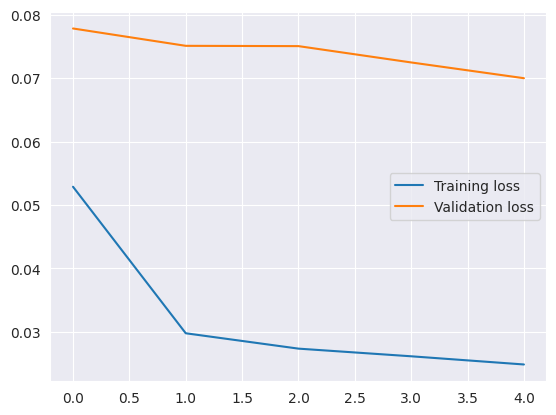

In [179]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
trainPredict = model.predict(trainX)

In [ ]:
# First 20 values predicted vs reel
a=pd.DataFrame(trainPredict)

b=pd.DataFrame(trainY)
c=a-b
pd.concat([a,b,c],axis=1).head(20)


In [331]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

4295/4295 [==============================] - 12s 3ms/step


In [171]:
trainPredict.shape
print(trainY.shape)

(137432, 1)


In [1]:
a=pd.DataFrame(trainPredict)

b=pd.DataFrame(trainY)
c=a-b
d = pd.concat([a,b,c],axis=1).head(20)
d.columns = [original, estimated, difference]
print(d)

NameError: name 'pd' is not defined

In [ ]:
from sklearn.metrics import mean_squared_error
trainScore = np.sqrt(mean_squared_error(a, b))
print(trainScore)

In [ ]:
#plot
# test_predict_1 = model_1.predict(X_test)
# print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_1)))

plt.figure(figsize = (20,10))
#plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (LSTM)', fontsize = 30)
plt.plot(trainYinverse[91541::200],linewidth = 1, label='True', color = 'blue')
plt.plot(trainPredictinverse[91541::200],linewidth = 1,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

In [189]:
predictions=[]
trainX_new=trainX
for i in range(24):
    trainX_last=trainX_new[-14:]
    trainPredict = model.predict(trainX_last)
    trainPredict=trainPredict.reshape((1,14,5))
    trainX_new=np.concatenate((trainX_new,trainPredict))
    

1/1 [==============================] - 0s 13ms/step


In [190]:
y_pred_future = scaler.inverse_transform(trainX_new[:,0,:])
print(y_pred_future)
print(y_pred_future.shape)

[[  11.7          89.9        1004.          307.            1.7       ]
 [  12.3          88.5        1004.6         288.            1.8       ]
 [  13.9          81.7        1005.          282.            2.        ]
 ...
 [  25.02146819   81.6573843   994.44437826  258.38507724    1.84936513]
 [  24.96375299   80.5083894   994.75964414  264.32655277    1.86592358]
 [  24.85436563   79.47923857  995.05734364  269.47699667    1.88726099]]
(137336, 5)


,0,0,0
0,0.111225,0.109978,0.001248
1,0.064208,0.252369,-0.188162
2,0.409714,0.109978,0.299736
3,-0.108966,-0.317196,0.208230
4,-0.503148,-0.388392,-0.114756
5,-0.217914,-0.246001,0.028087
6,-0.139983,-0.246001,0.106018
7,-0.279941,-0.103609,-0.176332
8,0.069243,-0.174805,0.244048
9,-0.312496,-0.174805,-0.137691


In [182]:
from sklearn.metrics import mean_squared_error
trainScore = np.sqrt(mean_squared_error(a, b))

In [183]:
trainScore # varanasi data

0.15414746809839916

In [191]:
#inverse
trainYinverse = (trainY+1.903069)/0.74628+0.6
trainPredictinverse = (trainPredict+1.903069)/0.74628+0.6


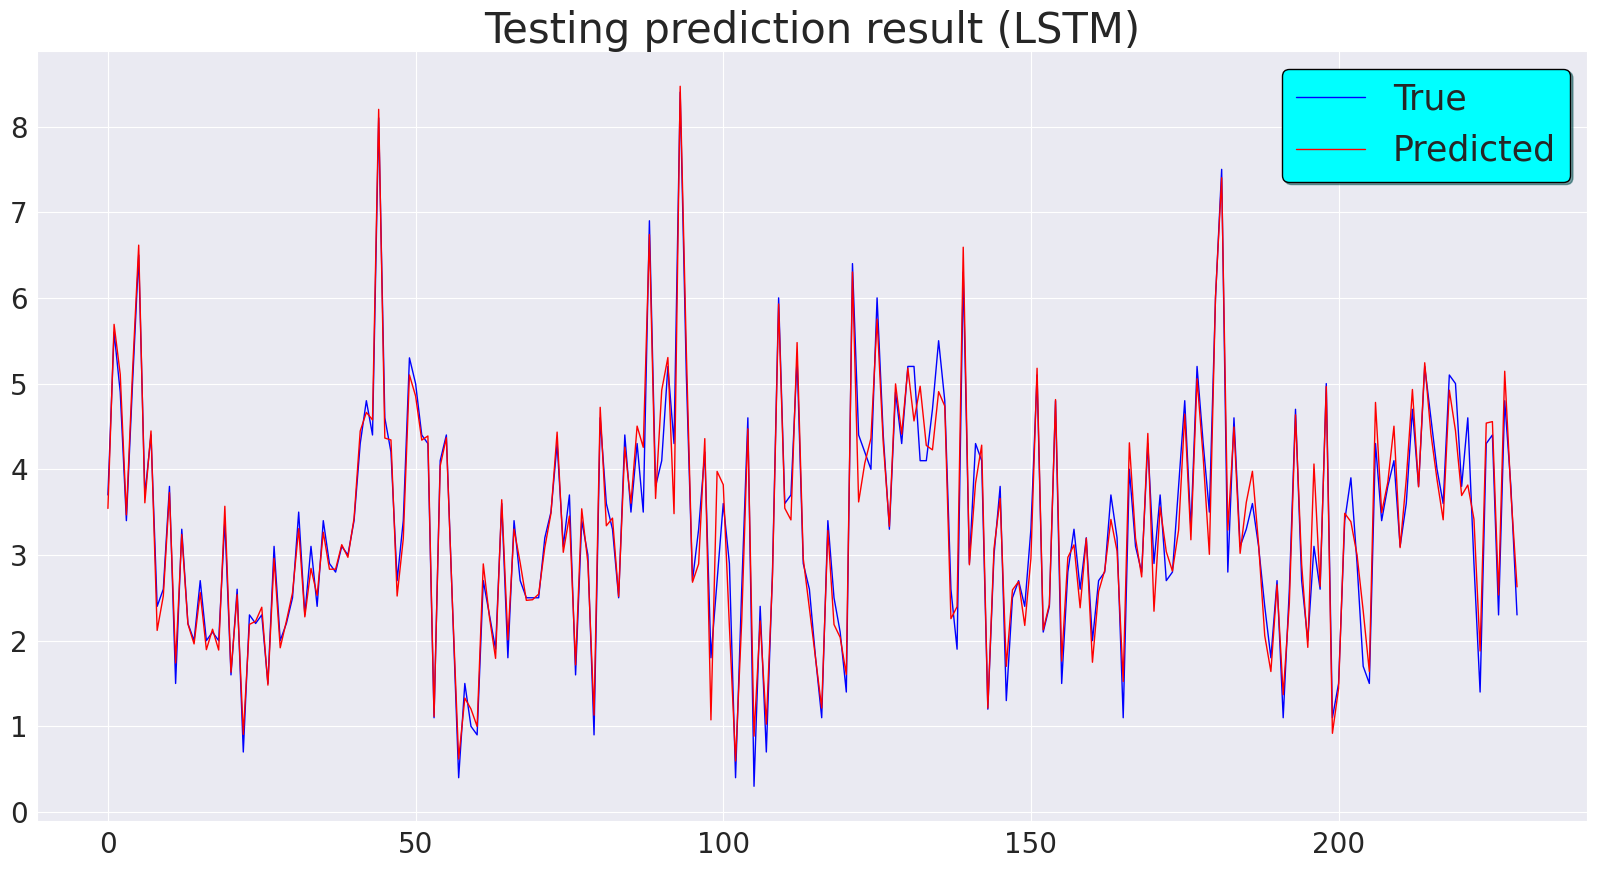

In [192]:
# test_predict_1 = model_1.predict(X_test)
# print('RMSE :', np.sqrt(mean_squared_error(y_test, test_predict_1)))

plt.figure(figsize = (20,10))
#plt.grid(b=True, which='major', axis='both')
plt.title('Testing prediction result (LSTM)', fontsize = 30)
plt.plot(trainYinverse[91541::200],linewidth = 1, label='True', color = 'blue')
plt.plot(trainPredictinverse[91541::200],linewidth = 1,color = 'red', label='Predicted')
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize=25,shadow=True,facecolor='cyan', edgecolor = 'k')
plt.show()

`# Luckhnow Data

In [75]:
df = pd.read_csv('file://localhost/home/nitish/Downloads/lukhnow.csv')
df.head()

,PeriodEnd,PeriodStart,Period,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindSpeed10m,WindDirection10m,Zenith,AlbedoDaily
0,2007-01-01T02:00:00Z,2007-01-01T01:00:00Z,PT60M,11.7,10.1,17.3,89.9,1004.0,1.7,307,90,0.2
1,2007-01-01T03:00:00Z,2007-01-01T02:00:00Z,PT60M,12.3,10.4,16.7,88.5,1004.6,1.8,288,78,0.2
2,2007-01-01T04:00:00Z,2007-01-01T03:00:00Z,PT60M,13.9,10.8,16.3,81.7,1005.0,2.0,282,68,0.2
3,2007-01-01T05:00:00Z,2007-01-01T04:00:00Z,PT60M,16.6,11.3,15.9,71.2,1005.1,2.2,285,59,0.2
4,2007-01-01T06:00:00Z,2007-01-01T05:00:00Z,PT60M,19.2,11.8,15.5,62.2,1005.2,2.4,288,53,0.2


In [76]:
df.drop(columns =['PeriodEnd','Period','Zenith','WindDirection10m','AlbedoDaily'],axis =1,inplace =True)

In [77]:
df.set_index(df['PeriodStart'], drop=False, append=False, inplace=True, verify_integrity=False)

In [78]:
df['PeriodStart'] =pd.to_datetime(df.PeriodStart)

In [ ]:
df.head()

,PeriodStart,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindSpeed10m
PeriodStart,,,,,,,
2007-01-01T01:00:00Z,2007-01-01 01:00:00+00:00,11.7,10.1,17.3,89.9,1004.0,1.7
2007-01-01T02:00:00Z,2007-01-01 02:00:00+00:00,12.3,10.4,16.7,88.5,1004.6,1.8
2007-01-01T03:00:00Z,2007-01-01 03:00:00+00:00,13.9,10.8,16.3,81.7,1005.0,2.0
2007-01-01T04:00:00Z,2007-01-01 04:00:00+00:00,16.6,11.3,15.9,71.2,1005.1,2.2
2007-01-01T05:00:00Z,2007-01-01 05:00:00+00:00,19.2,11.8,15.5,62.2,1005.2,2.4


In [79]:
cols = list(df)[1:7]

In [80]:
cols

['AirTemp',
 'DewpointTemp',
 'PrecipitableWater',
 'RelativeHumidity',
 'SurfacePressure',
 'WindSpeed10m']

In [81]:
df_for_training1 = df[cols].astype(float)

In [82]:
df_for_training1

,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindSpeed10m
PeriodStart,,,,,,
2007-01-01T01:00:00Z,11.7,10.1,17.3,89.9,1004.0,1.7
2007-01-01T02:00:00Z,12.3,10.4,16.7,88.5,1004.6,1.8
2007-01-01T03:00:00Z,13.9,10.8,16.3,81.7,1005.0,2.0
2007-01-01T04:00:00Z,16.6,11.3,15.9,71.2,1005.1,2.2
2007-01-01T05:00:00Z,19.2,11.8,15.5,62.2,1005.2,2.4
...,...,...,...,...,...,...
2022-08-31T18:00:00Z,29.6,23.0,66.2,67.9,990.2,2.4
2022-08-31T19:00:00Z,29.0,23.3,67.4,71.3,990.0,2.4
2022-08-31T20:00:00Z,28.6,23.4,68.2,73.6,989.7,2.1


<AxesSubplot:xlabel='PeriodStart'>

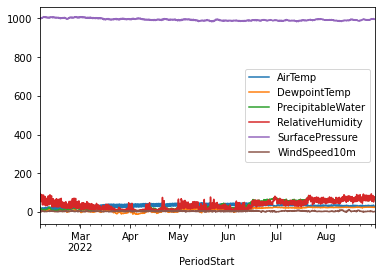

In [ ]:
df_for_plot=df_for_training.tail(5000)
df_for_plot.plot.line()

In [83]:
scaler1 = StandardScaler()
scaler1 = scaler.fit(df_for_training)
df_for_training_scaled1 = scaler.transform(df_for_training)

In [84]:
df_for_training_scaled1.shape

(137326, 6)

In [85]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 24  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -1])

trainX, trainY = np.array(trainX), np.array(trainY)

In [86]:
trainX.shape

(137302, 24, 6)

In [87]:
trainY.shape

(137302, 1)

In [ ]:
trainx_new =trainX[:100000]

In [ ]:
trianY_new =trainY[:100000]

In [ ]:
trainx_new.shape

(100000, 24, 6)

In [ ]:
trianY_new.shape

(100000, 1)

In [97]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 24, 64)            18176     
                                                                 
 lstm_7 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [98]:
history = model.fit(trainX,trainY, epochs=2, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/2
7724/7724 [==============================] - 99s 13ms/step - loss: 0.0679 - val_loss: 0.0775
Epoch 2/2
7724/7724 [==============================] - 69s 9ms/step - loss: 0.0442 - val_loss: 0.0705


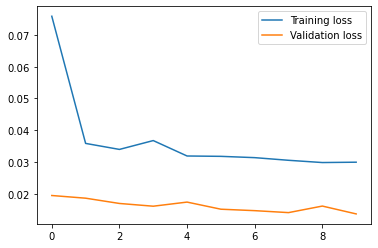

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [99]:
trainPredict = model.predict(trainX)

4291/4291 [==============================] - 13s 3ms/step


In [96]:
trainY

array([[ 0.75073904],
       [ 1.1067175 ],
       [ 1.32030457],
       ...,
       [-0.38839203],
       [-0.67317479],
       [-0.88676187]])

In [100]:
from sklearn.metrics import mean_squared_error
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))

In [101]:
trainScore

0.1628851331648814

In [ ]:
testx =trainX[100000:]

In [ ]:
testy =trainY[100000:]

In [ ]:
testy

array([[ 0.26533059],
       [ 0.41156849],
       [ 0.48468744],
       ...,
       [-0.02714521],
       [-0.17338312],
       [-0.17338312]])

In [ ]:
testPredict = model.predict(testx)

1165/1165 [==============================] - 5s 4ms/step


In [ ]:
testPredict

array([[ 0.15939128],
       [ 0.46593937],
       [ 0.4653367 ],
       ...,
       [-0.09503485],
       [-0.17112952],
       [-0.38013563]], dtype=float32)

In [ ]:
trainScore = np.sqrt(mean_squared_error(testy, testPredict))

In [ ]:
trainScore

0.2882193640731349

# Ahmedabad Data

In [ ]:
df1 =pd.read_csv("Ahmedabad.csv")

In [ ]:
df1.drop(columns =['PeriodEnd','Period','GtiFixedTilt','GtiTracking','Dhi','Ghi','Azimuth','Zenith','Dni','Ebh','SnowWater','WindDirection10m','AlbedoDaily'],axis =1,inplace =True)

In [ ]:
df1.drop("CloudOpacity",axis=1,inplace =True)

In [ ]:
df1['PeriodStart'] =pd.to_datetime(df.PeriodStart)

In [ ]:
df1.dtypes

PeriodStart          datetime64[ns, UTC]
AirTemp                          float64
DewpointTemp                     float64
PrecipitableWater                float64
RelativeHumidity                 float64
SurfacePressure                  float64
WindSpeed10m                     float64
dtype: object

In [ ]:
df1.set_index(df1['PeriodStart'], drop=False, append=False, inplace=True, verify_integrity=False)

In [ ]:
df

,PeriodStart,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindSpeed10m
PeriodStart,,,,,,,
2007-01-01 01:00:00+00:00,2007-01-01 01:00:00+00:00,11.7,10.1,17.3,89.9,1004.0,1.7
2007-01-01 02:00:00+00:00,2007-01-01 02:00:00+00:00,12.3,10.4,16.7,88.5,1004.6,1.8
2007-01-01 03:00:00+00:00,2007-01-01 03:00:00+00:00,13.9,10.8,16.3,81.7,1005.0,2.0
2007-01-01 04:00:00+00:00,2007-01-01 04:00:00+00:00,16.6,11.3,15.9,71.2,1005.1,2.2
2007-01-01 05:00:00+00:00,2007-01-01 05:00:00+00:00,19.2,11.8,15.5,62.2,1005.2,2.4
...,...,...,...,...,...,...,...
2022-08-31 18:00:00+00:00,2022-08-31 18:00:00+00:00,29.6,23.0,66.2,67.9,990.2,2.4
2022-08-31 19:00:00+00:00,2022-08-31 19:00:00+00:00,29.0,23.3,67.4,71.3,990.0,2.4
2022-08-31 20:00:00+00:00,2022-08-31 20:00:00+00:00,28.6,23.4,68.2,73.6,989.7,2.1


In [ ]:
cols = list(df)[1:7]

In [ ]:
df_for_training1 = df[cols].astype(float)

In [ ]:
df_for_training1

,AirTemp,DewpointTemp,PrecipitableWater,RelativeHumidity,SurfacePressure,WindSpeed10m
PeriodStart,,,,,,
2007-01-01 01:00:00+00:00,11.7,10.1,17.3,89.9,1004.0,1.7
2007-01-01 02:00:00+00:00,12.3,10.4,16.7,88.5,1004.6,1.8
2007-01-01 03:00:00+00:00,13.9,10.8,16.3,81.7,1005.0,2.0
2007-01-01 04:00:00+00:00,16.6,11.3,15.9,71.2,1005.1,2.2
2007-01-01 05:00:00+00:00,19.2,11.8,15.5,62.2,1005.2,2.4
...,...,...,...,...,...,...
2022-08-31 18:00:00+00:00,29.6,23.0,66.2,67.9,990.2,2.4
2022-08-31 19:00:00+00:00,29.0,23.3,67.4,71.3,990.0,2.4
2022-08-31 20:00:00+00:00,28.6,23.4,68.2,73.6,989.7,2.1


<AxesSubplot:xlabel='PeriodStart'>

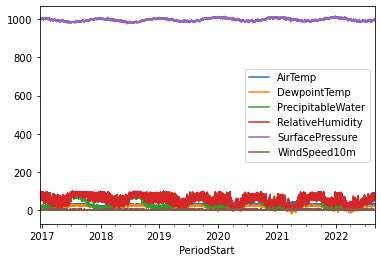

In [ ]:
df_for_plot=df_for_training.tail(50000)
df_for_plot.plot.line()

In [ ]:
scaler1 = StandardScaler()
scaler1 = scaler.fit(df_for_training)
df_for_training_scaled1 = scaler.transform(df_for_training)

In [ ]:
trainX = []
trainY = []

n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 24  # Number of past days we want to use to predict the future.

#Reformat input data into a shape: (n_samples x timesteps x n_features)
#In my example, my df_for_training_scaled has a shape (12823, 5)
#12823 refers to the number of data points and 5 refers to the columns (multi-variables).
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, -1])

trainX, trainY = np.array(trainX), np.array(trainY)

In [ ]:
trainx_new1 =trainX[:100000]

In [ ]:
trianY_new1 =trainY[:100000]

In [ ]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainx_new1.shape[1], trainx_new1.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 24, 64)            18176     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30,625
Trainable params: 30,625
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1 = model.fit(trainx_new1,trianY_new1, epochs=10, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/10
5625/5625 [==============================] - 48s 8ms/step - loss: 0.0571 - val_loss: 0.0192
Epoch 2/10
5625/5625 [==============================] - 43s 8ms/step - loss: 0.0347 - val_loss: 0.0187
Epoch 3/10
5625/5625 [==============================] - 43s 8ms/step - loss: 0.0319 - val_loss: 0.0165
Epoch 4/10
5625/5625 [==============================] - 44s 8ms/step - loss: 24.8123 - val_loss: 0.0167
Epoch 5/10
5625/5625 [==============================] - 45s 8ms/step - loss: 0.0297 - val_loss: 0.0156
Epoch 6/10
5625/5625 [==============================] - 49s 9ms/step - loss: 0.0288 - val_loss: 0.0155
Epoch 7/10
5625/5625 [==============================] - 46s 8ms/step - loss: 0.0287 - val_loss: 0.0168
Epoch 8/10
5625/5625 [==============================] - 45s 8ms/step - loss: 0.0292 - val_loss: 0.0152
Epoch 9/10
5625/5625 [==============================] - 45s 8ms/step - loss: 0.0292 - val_loss: 0.0141
Epoch 10/10
5625/5625 [==============================] - 43s 8ms/step - 

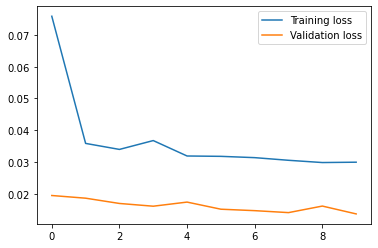

In [ ]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [ ]:
trainPredict = model.predict(trainX)

4290/4290 [==============================] - 18s 4ms/step


In [ ]:
testPredict

array([[ 0.15939128],
       [ 0.46593937],
       [ 0.4653367 ],
       ...,
       [-0.09503485],
       [-0.17112952],
       [-0.38013563]], dtype=float32)

In [ ]:
trainScore = np.sqrt(mean_squared_error(trainY, trainPredict))

In [ ]:
trainScore

0.19898666748904745

In [ ]:
trainPredict12 = model.predict(trainX[100000:])

1165/1165 [==============================] - 5s 4ms/step


In [ ]:
trainScore = np.sqrt(mean_squared_error(trainY[100000:], trainPredict12))

In [ ]:
trainScore

0.33246562065431473

In [146]:
a=[1,2,3,4,5]

In [147]:
a[:2:-1]

[5, 4]

array([[[-1.82802447,  1.13743582,  1.36170273,  0.95851828,
         -0.67317479],
        [-1.74787404,  1.07676022,  1.44782335,  0.7711505 ,
         -0.6019791 ],
        [-1.53413955,  0.78205012,  1.5052371 ,  0.71198173,
         -0.45958772],
        ...,
        [-1.12002897,  0.13628828,  1.21816835,  0.88948804,
         -0.24600064],
        [-1.33376346,  0.32264908,  1.28993554,  0.85990366,
         -0.24600064],
        [-1.53413955,  0.51767782,  1.36170273,  0.83031927,
         -0.17480495]],

       [[-1.74787404,  1.07676022,  1.44782335,  0.7711505 ,
         -0.6019791 ],
        [-1.53413955,  0.78205012,  1.5052371 ,  0.71198173,
         -0.45958772],
        [-1.17346259,  0.32698305,  1.51959054,  0.74156612,
         -0.31719634],
        ...,
        [-1.33376346,  0.32264908,  1.28993554,  0.85990366,
         -0.24600064],
        [-1.53413955,  0.51767782,  1.36170273,  0.83031927,
         -0.17480495],
        [-1.6677236 ,  0.63902904,  1.3904096 , 

In [126]:
trainX=np.concatenate((trainX,trainPredict))
trainX.shape

(137313, 14, 5)

In [124]:
trainPredict=trainPredict.reshape((1,14,5))
trainPredict.shape

(1, 14, 5)

[0.5, 1, 2, 3, 4, 5]
